# Group 21 Project Report

## Introduction

Heart disease is one of the leading causes of death in Canada. It encompasses all kinds of heart conditions such as coronary heart disease, heart defects, and arrythmia’s (irregularity in heartbeat). To better understand heart disease, it is important to look at the key factors that influence an individual’s risk of having this condition. In this project we will be looking at five different factors that have a correlation with heart disease. These factors are cholesterol, maximum heart rate, sex, age, and chest pain. These will be used as predictors in this project.

So how are each of these  predictors associated with heart disease? Based on scientific literature, high blood pressure places extra exertion on blood vessels, increasing tension on the arteries, which decreases blood flow to major organs and oxygen to the heart. Aside from this, people who have high levels of cholesterol could have fat deposits build up in the arteries, making it  challenging for blood to flow freely through the body. Additionally, regarding maximum heart rate, reaching the ideal heart rate range can indicate a healthy heart in good condition. If it exceeds a healthy range, the maximum heart rate of a patient can be used as an indicator of a potential heart issue. A common factor in many kinds of diseases is an increase in age, which is often correlated with a higher risk for heart disease. Lastly, incidence of chest pain can be a risk factor for heart disease if evaluated at abnormal levels. The data base classifies the chest pain type by typical chest pain (angina), atypical angina, no chest pain, and asymptomatic.

The question we want to answer is: are we able to predict whether a patient has heart disease based on their health profile? 

The information used to answer this question will be from the heart disease dataset, and used to create an accurate prediction model to classify new data. The heart disease data set encompasses 14 factors, in which five of them will be used as predictors and diagnosis of heart disease is what we will be predicting.

## Methods

To answer our research question, we used the heart disease data collected from the Cleveland hospital. Initially, cholesterol levels (chol), resting blood pressure (trestbps), age (age), chest pain (cp), and maximum heart rate (thalach) are the five variables that were used as the predictors in our classification model, due to their aforementioned strong association with heart disease. We used the K-nearest neighbors classification algorithm to predict the presence of heart disease, denoted the “predicted attribute” in our code, which we have simplified to a binary factor that indicates its presence or absence, denoted as "Positive" or "Negative" respectively. For our preliminary exploratory data analysis, we summarized the Cleaveland hospital data into a data frame that grouped the patient data by their respective sex (male or female) and heart condition (Positive or Negative for heart disease) in order to calculate the mean values of three quantifiable predictors: cholesterol, resting blood pressure, and maximum heart rate. This was done to see if patients with heart disease tend to have higher mean values of the aforementioned variables, before visualizating the data. These mean values revelead that a higher maximum heart rate does not necessarily lead to heart disease, as the maximum heart rate achieved in positive patients was actually lower than the mean value in negative patients, which is contrary to our expectations. To visualize this trend, a histogram that expressed the distribution of patients with varying maximum heart rates was created, which reinforced the notion that a higher maximum heart rate was not measured in patients with heart disease, as positive cases had a heart rate distribution that was skewed lower compared to negative cases (reaffirmed by a lower median). Likewise, analyzing the mean and median values of cholesterol levels revealed that positive cases had slightly higher distributions of cholesterol levels, which was expected based on literature. To visualize and analyze chest pain as a predictor, we created a bar graph quantifying the number of patients with varying levels of chest pain, 1 corresponding to typical, 2 to atypical, 3 to no pain, and 4 to asymptomatic. Profoundly, this showed that asymptomatic chest pain was associated with positive cases, while the remaining levels of chest pain were mostly found in negative patients. However, grouping by sex revealed that there were differences between males and females in their resting blood pressure, cholesterol levels, and maximum heart rate, suggesting that it may a valuable predictor to add to our model. Regarding the resting blood pressure (trestbps), our summary data of the mean and median blood pressure between positive and negative cases revealed that blood pressure did not appreciably affect the incidence of heart disease, since the medians and means were almost indentical, and were centered similarily on our blood pressure histogram. As such, contrary to our original approach, we believed that blood pressure would not be a useful predictor in our model, and was removed before proceeding further. Altogether, exploratory data analysis resulted in the inclusion of sex into our model, replacing  resting blood pressure, leaving our five predictors as age (age), sex (sex), chest pain (cp), maximum heart rate (thalach), and cholesterol (chol).

To begin constructing our model, we started by splitting our data into a training and a testing set. 75% of the total data was used as training data, while the remaining 25% was used as testing data -- set aside and untouched. Our training set was further subdivided into training and validation sets by virtue of five fold cross-validation; this was done to increase the accuracy of our prediction by determining the optimal K value to tune our model, without using our testing data. We then created our recipe which included the five aforementioned predictors: age, sex, chest pain, maximum heart rate, and cholesterol -- with all predictors scaled and centered to achieve equal weighting. We then created our model specification that employed K-nearest neighbors by calculating the straight-line distance with an array of K values from 1-60. Both the model and recipe were passed into our workflow to collect accuracy metrics on our different K values, which we analyzed to select the optimal K value. Determining the optimal K value for our model was done by creating a visualization that plotted  accuracy against the K values of 1 through 60. From the plot, we determined that the optimal K value was ___ . A scatter plot will be used to visualize the correlation between what we believe to be two major variables and indicators of heart disease, cholesterol and resting blood pressure. The points will be coloured based on the presence of heart disease in each patient. Resting blood pressure and cholesterol will be plotted on the x and y axes respectively. 

In [5]:
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_character(),
  thal = col_character(),
  the_predicted_attribute = col_double()
)



age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,the_predicted_attribute
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2


age,sex,trestbps,chol,thalach,cp,the_predicted_attribute
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,145,233,150,1,Negative
67,1,160,286,108,4,Positive
67,1,120,229,129,4,Positive
37,1,130,250,187,3,Negative
41,0,130,204,172,2,Negative
56,1,120,236,178,2,Negative
62,0,140,268,160,4,Positive
57,0,120,354,163,4,Negative
63,1,130,254,147,4,Positive


`summarise()` regrouping output by 'sex' (override with `.groups` argument)



sex,the_predicted_attribute,mean(chol),mean(thalach),mean(trestbps)
<chr>,<fct>,<dbl>,<dbl>,<dbl>
Female,Negative,256.7500,154.0278,128.7361
Female,Positive,276.1600,143.1600,146.6000
Male,Negative,231.5978,161.7826,129.6522
Male,Positive,246.0614,138.4035,131.9298


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`summarise()` ungrouping output (override with `.groups` argument)



the_predicted_attribute,mean,median
<fct>,<dbl>,<dbl>
Negative,129.2500,130
Positive,134.5683,130


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



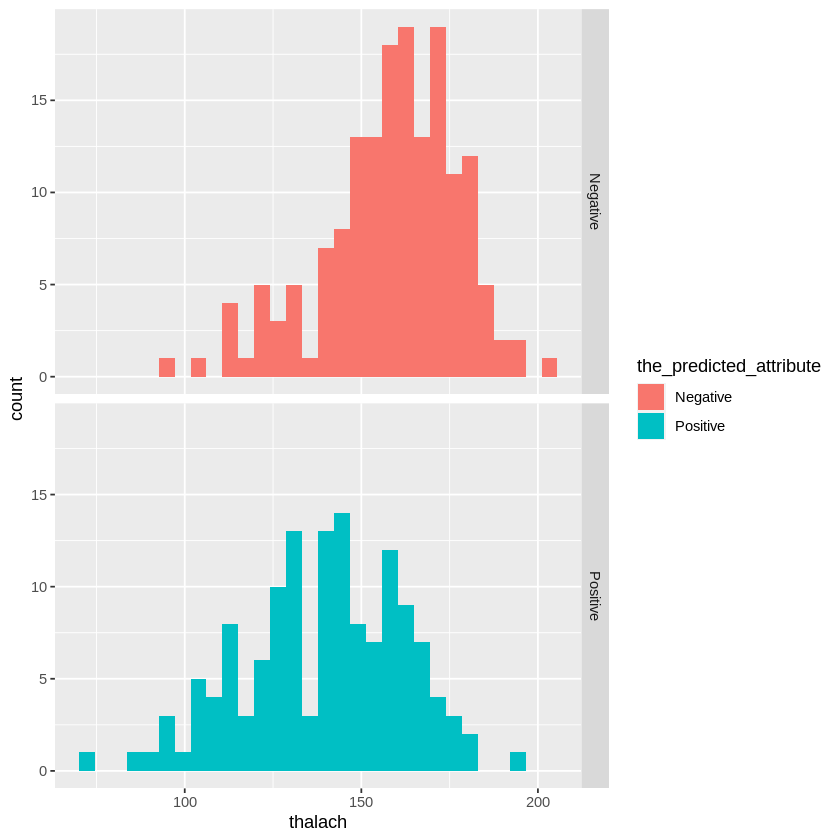

`summarise()` ungrouping output (override with `.groups` argument)



the_predicted_attribute,mean,median
<fct>,<dbl>,<dbl>
Negative,242.6402,234.5
Positive,251.4748,249.0


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



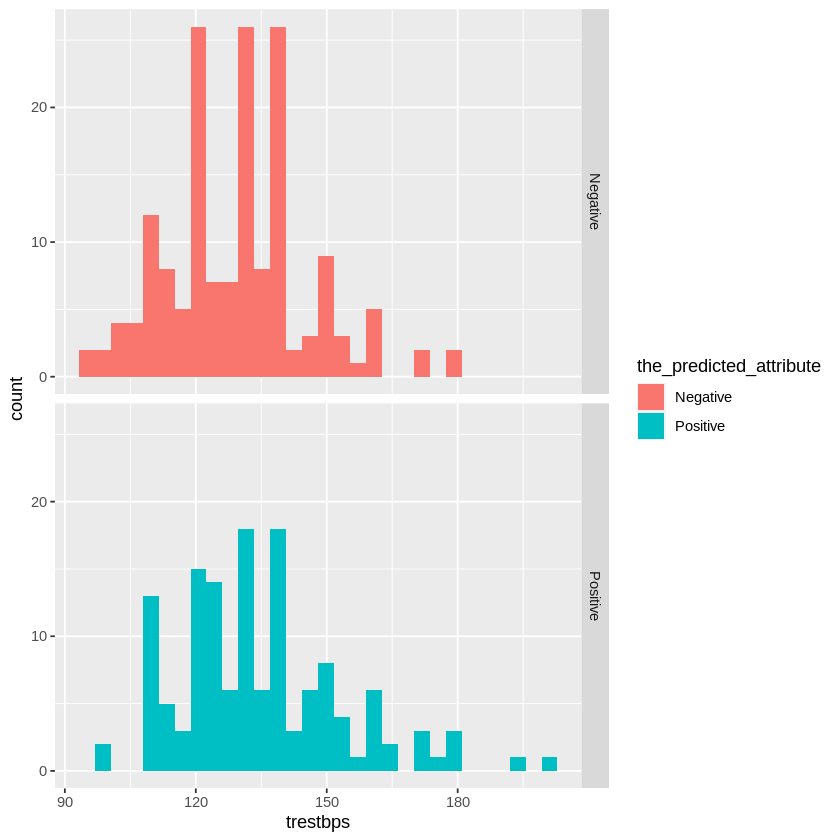

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



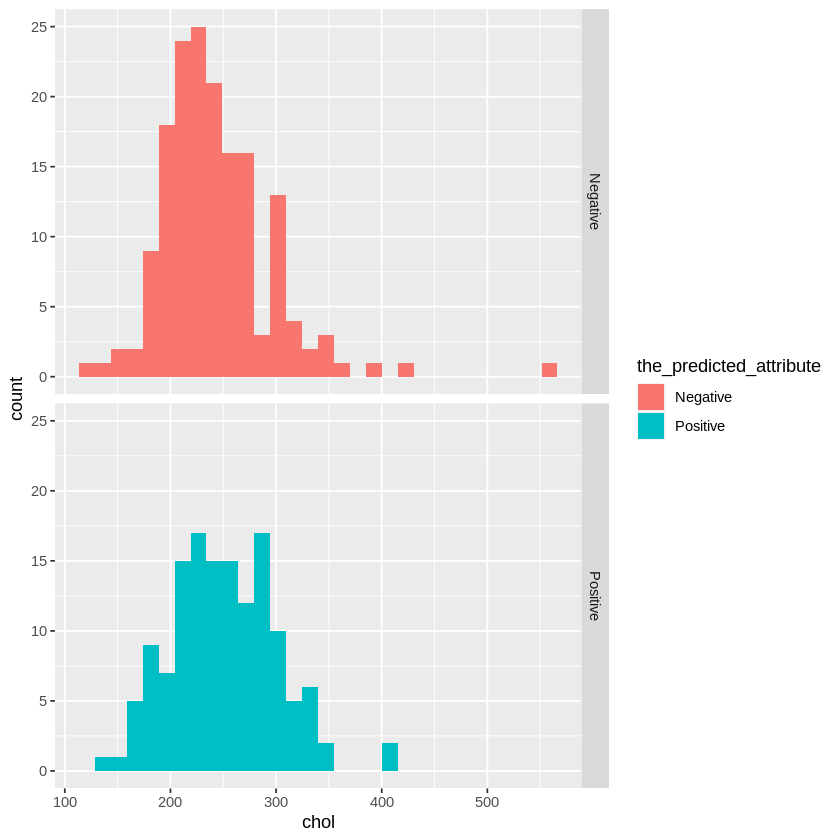

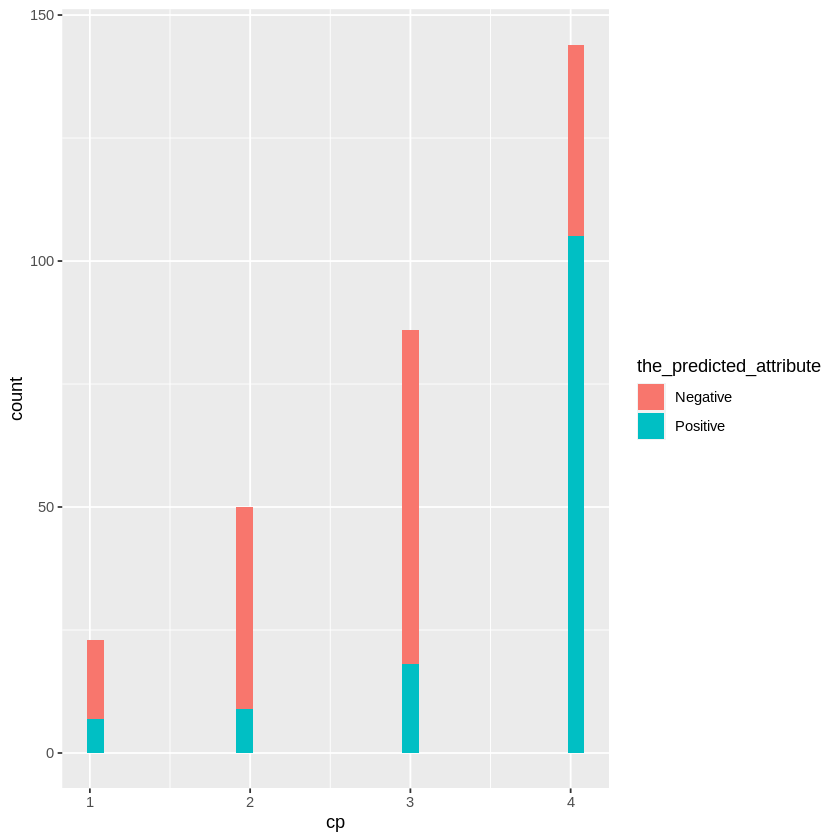

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7866667
kap,binary,0.5674117


          Truth
Prediction Negative Positive
  Negative       34        9
  Positive        7       25

<ggproto object: Class ScaleDiscrete, Scale, gg>
    aesthetics: colour
    axis_order: function
    break_info: function
    break_positions: function
    breaks: waiver
    call: call
    clone: function
    dimension: function
    drop: TRUE
    expand: waiver
    get_breaks: function
    get_breaks_minor: function
    get_labels: function
    get_limits: function
    guide: legend
    is_discrete: function
    is_empty: function
    labels: Positive Negative
    limits: NULL
    make_sec_title: function
    make_title: function
    map: function
    map_df: function
    n.breaks.cache: NULL
    na.translate: TRUE
    na.value: NA
    name: waiver
    palette: function
    palette.cache: NULL
    position: left
    range: <ggproto object: Class RangeDiscrete, Range, gg>
        range: NULL
        reset: function
        train: function
        super:  <ggproto object: Class RangeDiscrete, Range, gg>
    rescale: function
    reset: function
    scale_name: manual
    train: functio

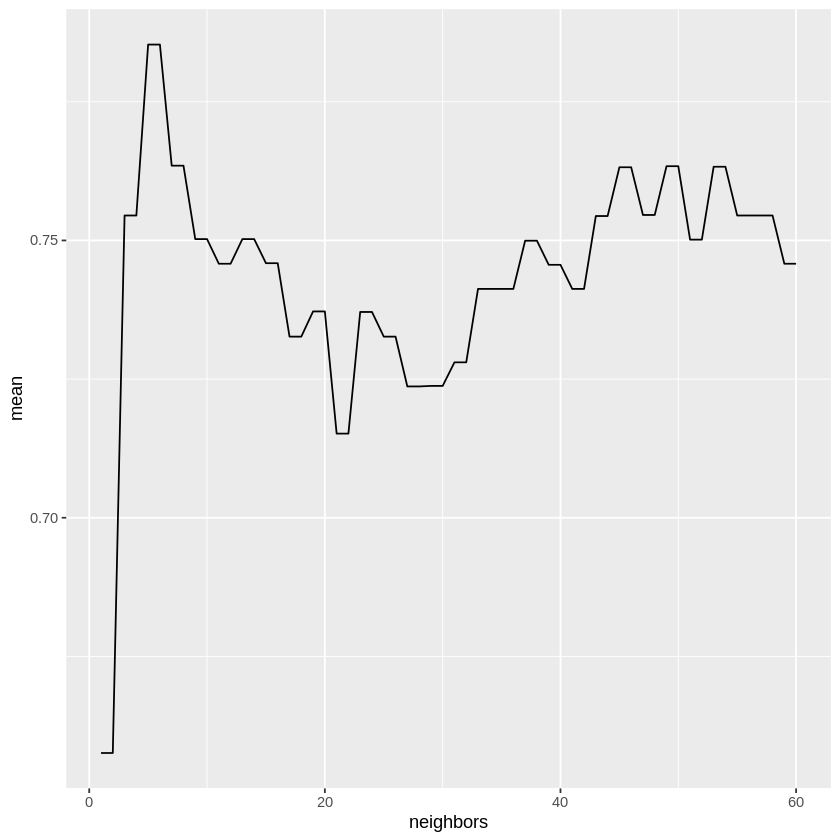

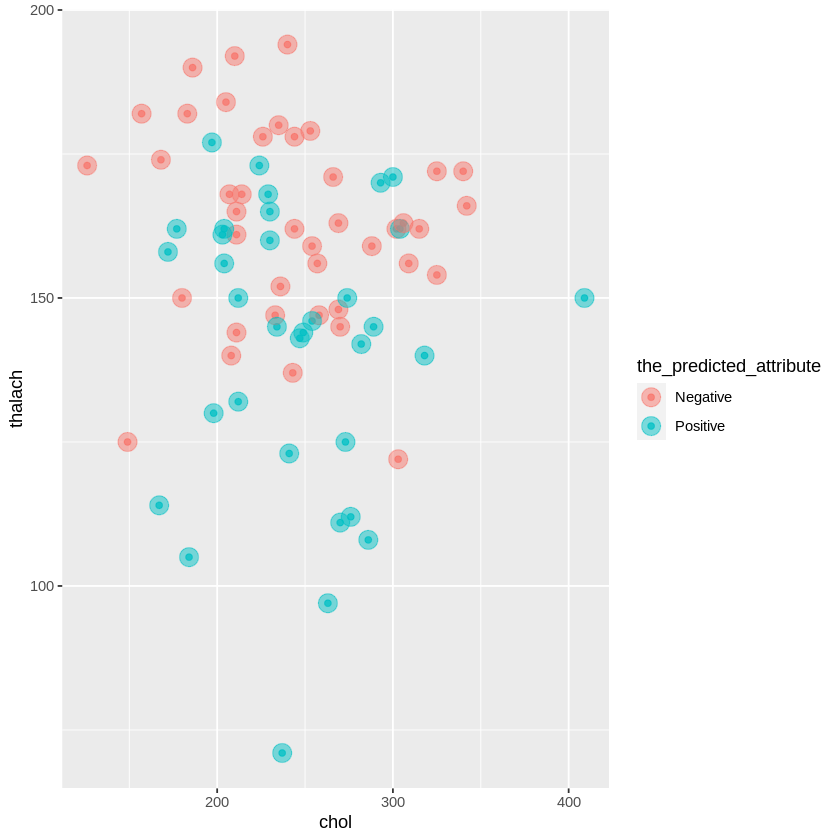

In [6]:
# Set the seed
set.seed(7594)

# Reading, Cleaining, and Wrangling

# Reading in the Cleaveland Heart Disease data
rd <-read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
             col_names=c("age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","the_predicted_attribute"))
rd

# Selecting the five initial predictors
HD_selected<-select(rd,age,sex,trestbps,chol,thalach,cp,the_predicted_attribute)

# Mutating the data to convert the "predicted attribute", or incidence of heart disease, into a binary factor of either "Positive" for presence, or "Negative" for absence
HD_mutated <-HD_selected%>%
            mutate(the_predicted_attribute=ifelse(the_predicted_attribute==0,"Negative","Positive"))%>%
            mutate(the_predicted_attribute=as.factor(the_predicted_attribute))
           
HD_mutated


# Summarizing data for exploratory analysis

# Data frame used to show difference in sex and unforseen thalach observation
HD_summarize <- HD_mutated %>%
            group_by(sex,the_predicted_attribute)%>%
            summarize(mean(chol),mean(thalach),mean(trestbps))%>%
            mutate(sex=ifelse(sex==1,"Male","Female"))
HD_summarize

# Plot used to visualize thalach
ggplot(HD_mutated,aes(x=thalach,fill=the_predicted_attribute))+
geom_histogram()+
facet_grid(rows = vars(the_predicted_attribute))

# Data frame used to show similar median/mean to justify removing trestbps
HD_summarize_2<-HD_mutated%>%
group_by(the_predicted_attribute)%>%
summarize(mean=mean(trestbps),median=median(trestbps))
HD_summarize_2

# Plot used to visualize trestbps
ggplot(HD_mutated,aes(x=trestbps,fill=the_predicted_attribute))+
geom_histogram()+
facet_grid(rows = vars(the_predicted_attribute))

# Data frame used to observe the slight skew in higher cholesterol levels for positive cases
HD_summarize_3<-HD_mutated%>%
group_by(the_predicted_attribute)%>%
summarize(mean=mean(chol),median=median(chol))
HD_summarize_3

# Plot used to visualize cholesterol
ggplot(HD_mutated,aes(x=chol,fill=the_predicted_attribute))+
geom_histogram()+
facet_grid(rows = vars(the_predicted_attribute))

# Plot used to visualize chest pain
ggplot(HD_mutated,aes(x=cp,fill=the_predicted_attribute))+
geom_histogram()


# Classification Model 

# Training/Test split
HD_split <- initial_split(HD_mutated, prop = 3/4, strata = the_predicted_attribute)  
HD_train <- training(HD_split)   
HD_test  <- testing(HD_split)

# 5 fold cross-validation
HD_vfold<-vfold_cv(HD_train, v = 5, strata = the_predicted_attribute)

# Recipe
HD_recipe<-recipe(the_predicted_attribute ~age+sex+thalach+chol+cp, data=HD_train) %>%
                step_scale(all_predictors()) %>%
                step_center(all_predictors())

# Model specification (tuning)
HD_spec<- nearest_neighbor(weight_func ="rectangular" , neighbors = tune()) %>% 
       set_engine("kknn") %>%
       set_mode("classification")

# Workflow
HD_fit <- workflow() %>%
       add_recipe(HD_recipe) %>%
       add_model(HD_spec) %>%
       tune_grid(resamples = HD_vfold, grid = tibble(neighbors = seq(from = 1, to = 60))) %>%
       collect_metrics()

# Accuracy metrics to pick optimal K
accuracy_graph<-HD_fit%>%
        filter(.metric=="accuracy")%>%
        ggplot(aes(x=neighbors,y=mean))+
        geom_line()
accuracy_graph

# Recreating model specification with optimal K
HD_best_spec<- nearest_neighbor(weight_func ="rectangular" , neighbors = 20) %>%
       set_engine("kknn") %>%
       set_mode("classification")

# Fitting the model with optimal K (same recipe, new model specification)
HD_best_fit <- workflow() %>%
       add_recipe(HD_recipe) %>%
       add_model(HD_best_spec) %>%
         fit(data=HD_train)

# Predicting
HD_test_predictions<-predict(HD_best_fit,HD_test)%>%
            bind_cols(HD_test)

# Prediction accuracy and confusion matrix
HD_prediction_accuracy <- HD_test_predictions %>%
         metrics(truth = the_predicted_attribute, estimate = .pred_class)  
HD_prediction_accuracy
conf_mat(HD_test_predictions,truth = the_predicted_attribute, estimate = .pred_class)


# Final visualization for data analysis
graph_analysis<-HD_mutated%>%
                ggplot()+
                geom_point(data=HD_test,
                           mapping = aes(x = chol, 
                           y = thalach, 
                           color = the_predicted_attribute),
                          alpha=0.75)+
                geom_point(data=HD_test_predictions,
                          mapping = aes(x = chol, 
                           y = thalach, 
                           color = the_predicted_attribute),
                          alpha=0.5,
                          size=5)
                scale_color_manual(labels = c("Positive", "Negative"), 
                     values = c("orange", "steelblue"))
graph_analysis



## References

Aha, D. (2019). Heart Disease Data Set. UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/citation_policy.html 

Lennep, J., Westerveld, H., Erkelens, D., & Van der Wall, E. (2002). Risk factors for coronary heart disease: implications of gender. Cardiovascular Research. 53(3). 538-549.  https://doi.org/10.1016/S0008-6363(01)00388-1

Thayer, J., Yamamoto, S., & Brosschot, J. (2010). The relationship of autonomic imbalance, heart rate variability and cardiovascular disease risk factors. Internal Journal of Cardiology, 141(2). 122-131. https://doi.org/10.1016/j.ijcard.2009.09.543